### Step 1: Import Required Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import joblib

### Step 2: Load the Dataset

In [39]:
# Load the dataset
df = pd.read_csv('./TCS_stock_history.csv')
print("Dataset loaded successfully.")
display(df.head())

Dataset loaded successfully.


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-08-12,28.794172,29.742206,28.794172,29.519140,212976,0.0,0.0
1,2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0
2,2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0
3,2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0
4,2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0


### Step 3: Data Preprocessing

In [27]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Display info about the dataframe to check data types and missing values
print("\nDataFrame Info after preprocessing:")
display(df.info())

# Check for missing values
print("\nMissing values per column:")
display(df.isnull().sum())


DataFrame Info after preprocessing:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4463 entries, 2002-08-12 to 2021-09-30
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          4463 non-null   float64
 1   High          4463 non-null   float64
 2   Low           4463 non-null   float64
 3   Close         4463 non-null   float64
 4   Volume        4463 non-null   int64  
 5   Dividends     4463 non-null   float64
 6   Stock Splits  4463 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 278.9 KB


None


Missing values per column:


,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0


### Step 4: Exploratory Data Analysis (EDA)

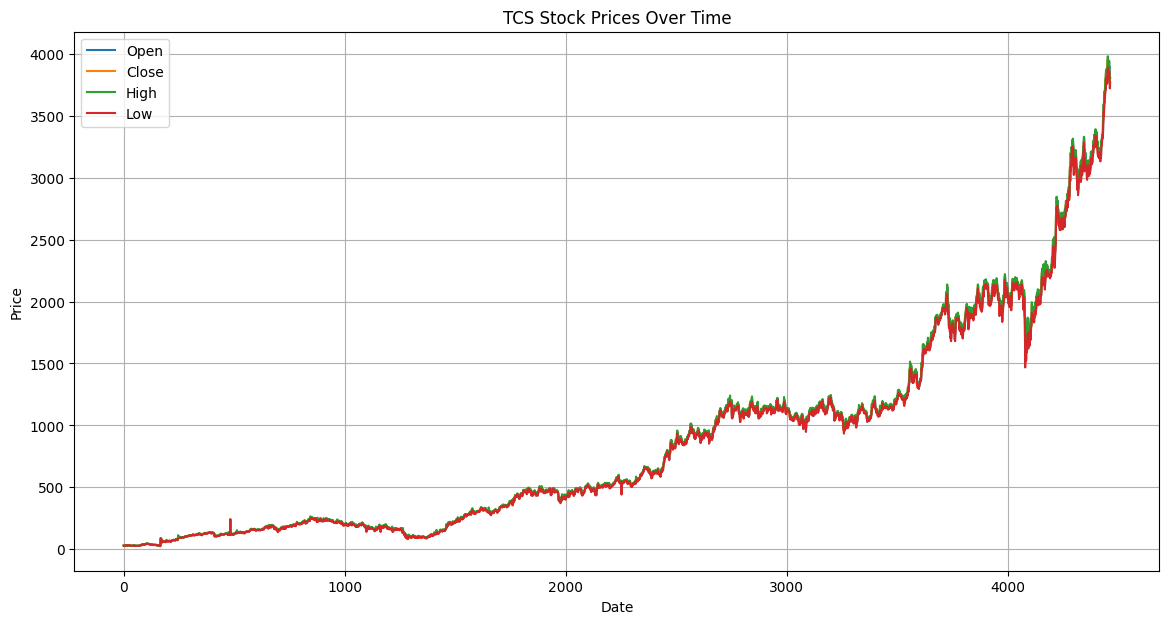

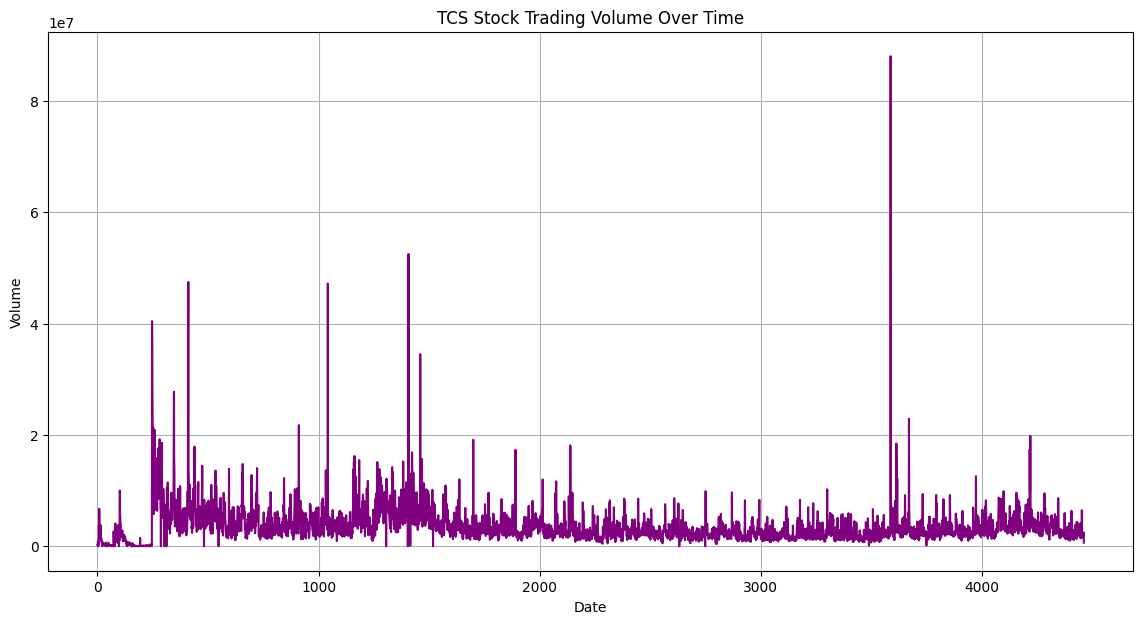

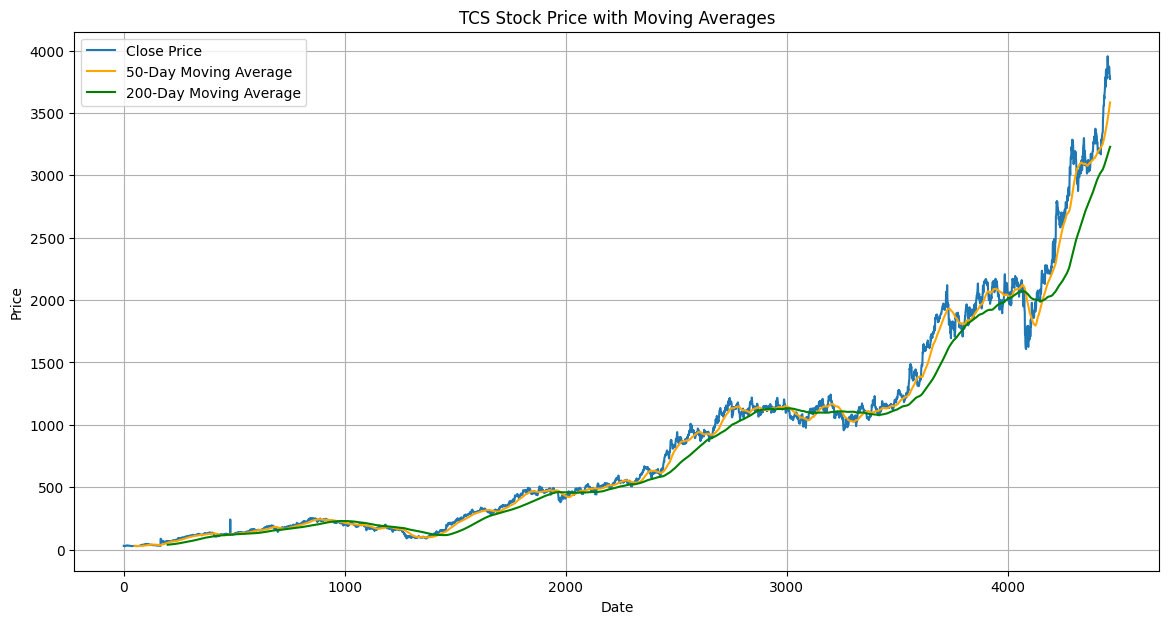

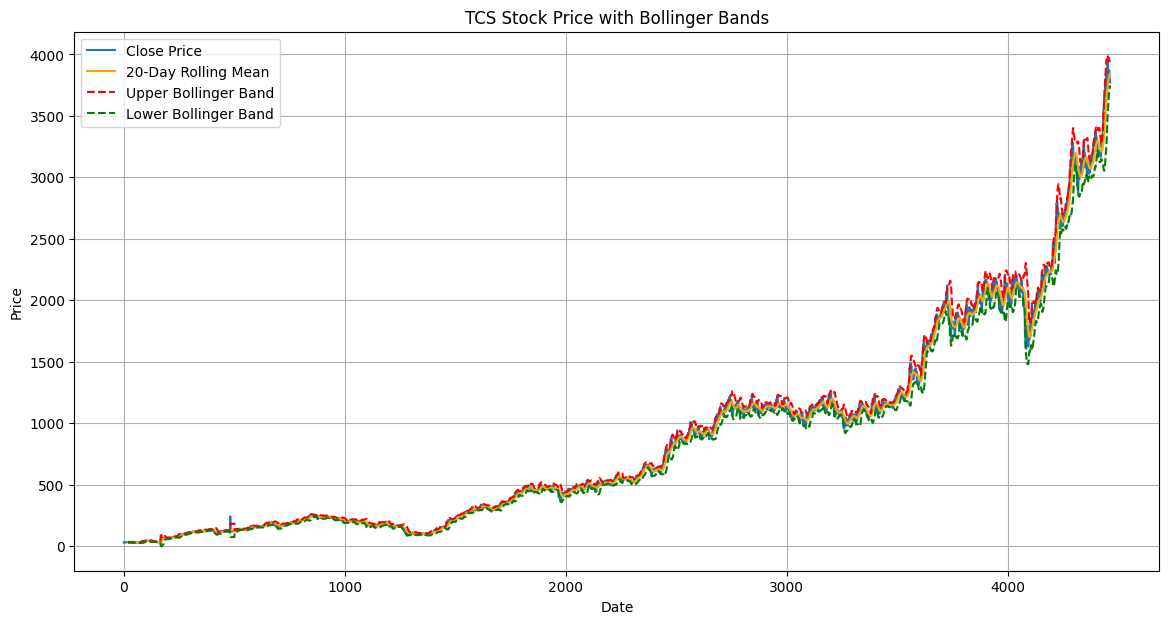

In [41]:
# Visualize Open, Close, High, and Low prices over time
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Open'], label='Open')
plt.plot(df.index, df['Close'], label='Close')
plt.plot(df.index, df['High'], label='High')
plt.plot(df.index, df['Low'], label='Low')
plt.title('TCS Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Analyze trading volumes
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Volume'], label='Volume', color='purple')
plt.title('TCS Stock Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Calculate and visualize moving averages
df['MA_50'] = df['Close'].rolling(window=50).mean()
df['MA_200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['MA_50'], label='50-Day Moving Average', color='orange')
plt.plot(df.index, df['MA_200'], label='200-Day Moving Average', color='green')
plt.title('TCS Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and visualize Bollinger Bands
window = 20
df['Rolling_Mean'] = df['Close'].rolling(window=window).mean()
df['Rolling_Std'] = df['Close'].rolling(window=window).std()
df['Upper_Band'] = df['Rolling_Mean'] + (df['Rolling_Std'] * 2)
df['Lower_Band'] = df['Rolling_Mean'] - (df['Rolling_Std'] * 2)

plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Close'], label='Close Price')
plt.plot(df.index, df['Rolling_Mean'], label=f'{window}-Day Rolling Mean', color='orange')
plt.plot(df.index, df['Upper_Band'], label='Upper Bollinger Band', color='red', linestyle='--')
plt.plot(df.index, df['Lower_Band'], label='Lower Bollinger Band', color='green', linestyle='--')
plt.fill_between(df.index, df['Lower_Band'], df['Upper_Band'], color='grey', alpha=0.1)
plt.title('TCS Stock Price with Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

### Step 5: Feature Engineering

In [29]:
# Extract date-related features
df['Year'] = df.index.year
df['Month'] = df.index.month
df['Day'] = df.index.day
df['DayOfWeek'] = df.index.dayofweek

# Create lag features (e.g., previous day’s close, previous day’s high/low)
df['Close_Lag1'] = df['Close'].shift(1)
df['High_Lag1'] = df['High'].shift(1)
df['Low_Lag1'] = df['Low'].shift(1)
df['Volume_Lag1'] = df['Volume'].shift(1)

# Drop rows with NaN values created by lagging
df.dropna(inplace=True)

print("\nDataFrame after Feature Engineering:")
display(df.head())


DataFrame after Feature Engineering:


,Open,High,Low,Close,Volume,Dividends,Stock Splits,Year,Month,Day,DayOfWeek,Close_Lag1,High_Lag1,Low_Lag1,Volume_Lag1
Date,,,,,,,,,,,,,,,
2002-08-13,29.556316,30.030333,28.905705,29.119476,153576,0.0,0.0,2002,8,13,1,29.519140,29.742206,28.794172,212976.0
2002-08-14,29.184536,29.184536,26.563503,27.111877,822776,0.0,0.0,2002,8,14,2,29.119476,30.030333,28.905705,153576.0
2002-08-15,27.111877,27.111877,27.111877,27.111877,0,0.0,0.0,2002,8,15,3,27.111877,29.184536,26.563503,822776.0
2002-08-16,26.972458,28.255089,26.582090,27.046812,811856,0.0,0.0,2002,8,16,4,27.111877,27.111877,27.111877,0.0
2002-08-19,27.269876,27.269876,26.126661,26.377609,205880,0.0,0.0,2002,8,19,0,27.046812,28.255089,26.582090,811856.0


### Step 6: Model Building and Prediction

In [30]:
# Define features (X) and target (y)
features = ['Open', 'High', 'Low', 'Volume', 'Year', 'Month', 'Day', 'DayOfWeek',
            'Close_Lag1', 'High_Lag1', 'Low_Lag1', 'Volume_Lag1']
target = 'Close'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set shape: X_train - {X_train.shape}, y_train - {y_train.shape}")
print(f"Testing set shape: X_test - {X_test.shape}, y_test - {y_test.shape}")

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("\nLinear Regression model trained successfully.")

# Make predictions on the testing set
y_pred = model.predict(X_test)

print("\nPredictions made on the testing set.")

Data split into training and testing sets.
Training set shape: X_train - (3569, 12), y_train - (3569,)
Testing set shape: X_test - (893, 12), y_test - (893,)

Linear Regression model trained successfully.

Predictions made on the testing set.


### Step 7: Visualize Model Performance

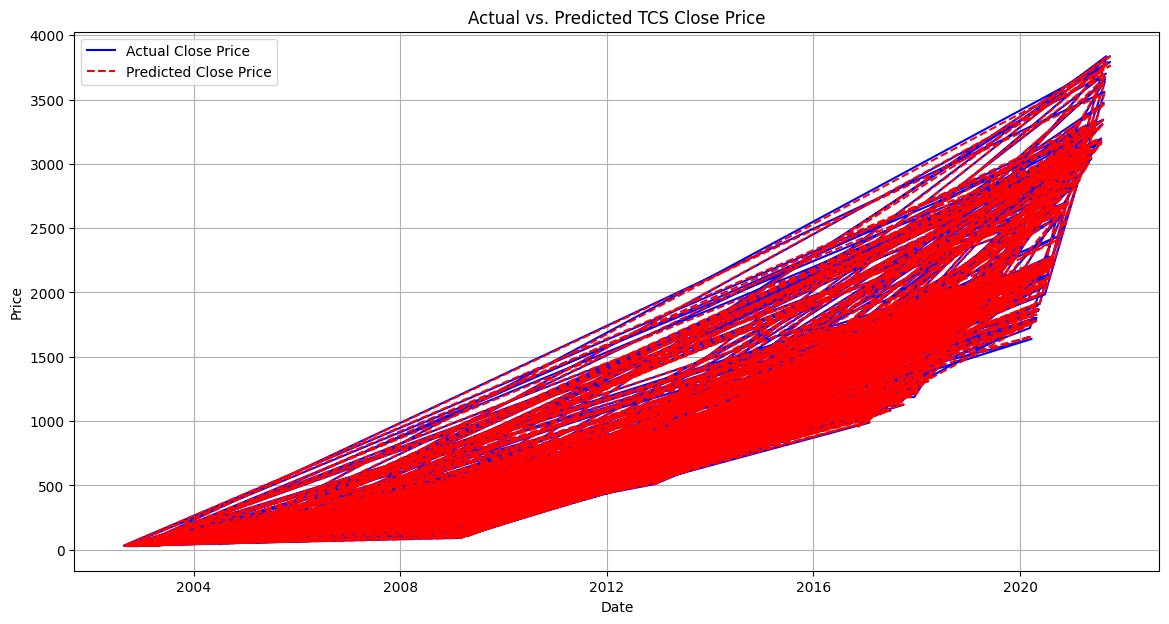

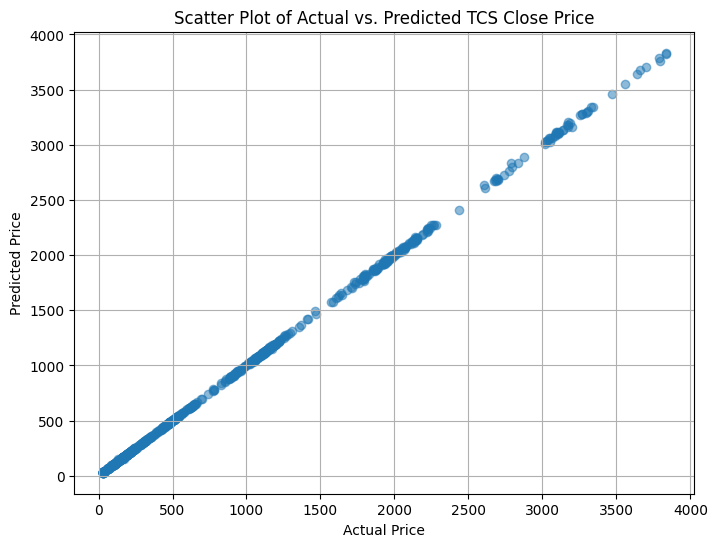

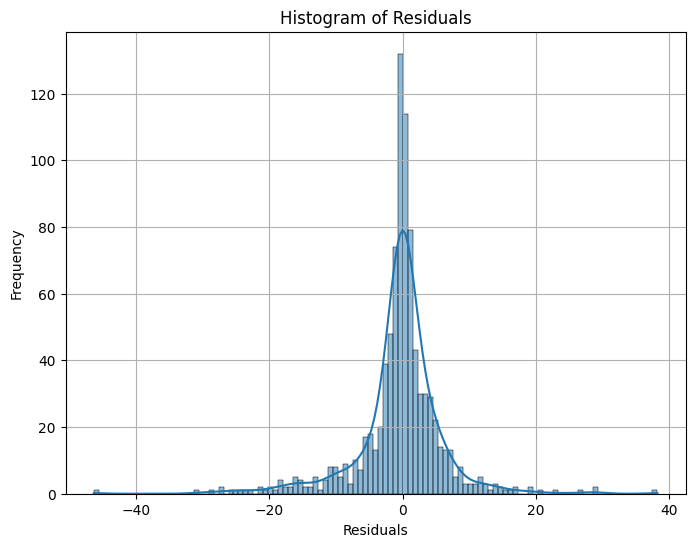

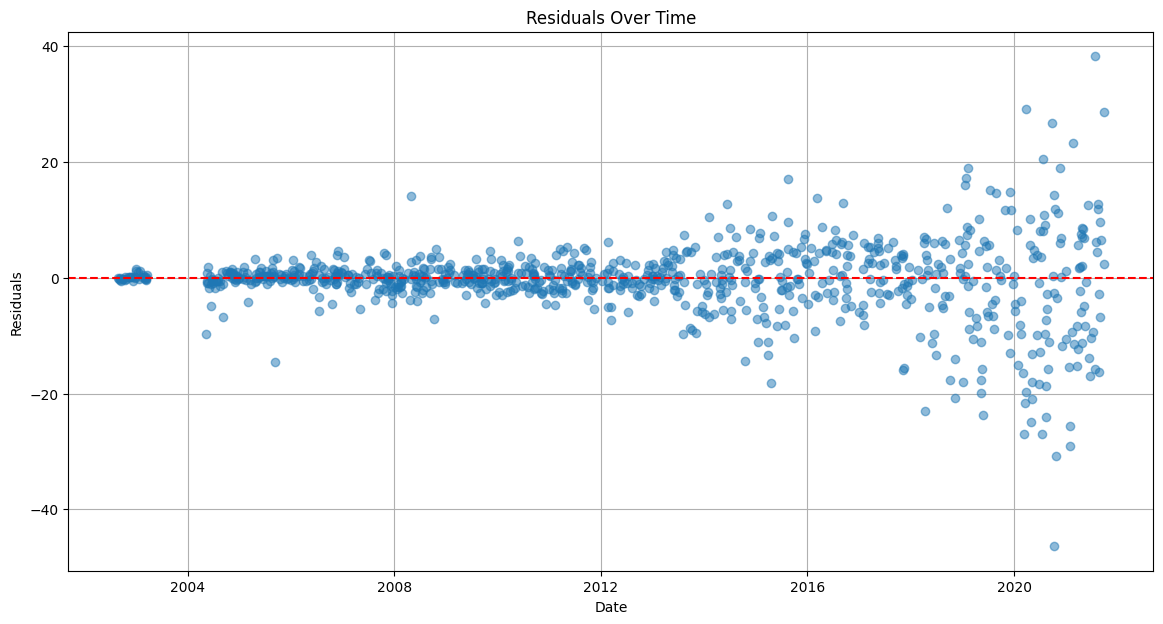

In [37]:
# Visualize predicted vs. actual values
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, y_test, label='Actual Close Price', color='blue')
plt.plot(y_test.index, y_pred, label='Predicted Close Price', color='red', linestyle='--')
plt.title('Actual vs. Predicted TCS Close Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

# Scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Scatter Plot of Actual vs. Predicted TCS Close Price')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.grid(True)
plt.show()

# Calculate residuals
residuals = y_test - y_pred

# Plot histogram of residuals
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot residuals over time
plt.figure(figsize=(14, 7))
plt.plot(y_test.index, residuals, marker='o', linestyle='', alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals Over Time')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()



### Step 8: Save the Model

In [32]:
import joblib

# Save the trained model
filename = 'linear_regression_model.pkl'
joblib.dump(model, filename)

print(f"Model saved as {filename}")

Model saved as linear_regression_model.pkl


### Summary of Project

This project aimed to analyze the historical data of TCS stock, gain insights into its behavior, and build a machine learning model to predict future stock prices. We followed a structured approach, starting from data loading and preprocessing, moving through exploratory data analysis and feature engineering, and finally building and evaluating a Linear Regression model.